In [10]:
import tensorflow as tf
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import ViTImageProcessor, ViTForImageClassification

# Load the trained models
MODEL_PATH_PTH = r"Combined_Dataset\Vit_combined_data.pth"  # Update with actual path
MODEL_PATH_KERAS = r"TRI-NET\final_tri_net_model.keras"  # Update with actual path

# Load PyTorch model
model_pth = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=5)
model_pth.load_state_dict(torch.load(MODEL_PATH_PTH, map_location=torch.device('cpu')))
model_pth.eval()

# Load Keras model
model_keras = tf.keras.models.load_model(MODEL_PATH_KERAS)

print("Both models loaded successfully!")

# Load image processor for ViT preprocessing
image_processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

# Define function to process image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = image_processor(images=image, return_tensors="np")
    return image, inputs['pixel_values']

# Define function for prediction with visualization
def predict_with_model(image_path, model, class_names, model_name, is_pytorch=False):
    image, inputs = preprocess_image(image_path)
    
    if is_pytorch:
        inputs = torch.tensor(inputs, dtype=torch.float32)
        with torch.no_grad():
            outputs = model(**{"pixel_values": inputs})
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=-1).numpy()[0]
    else:
        # Ensure input format for Keras model
        inputs = np.array(inputs).astype("float32")
        if len(inputs.shape) == 3:
            inputs = np.expand_dims(inputs, axis=0)  # Ensure batch dimension
        
        # Convert (1, 3, 224, 224) -> (1, 224, 224, 3)
        inputs = np.transpose(inputs, (0, 2, 3, 1))
        
        predictions = model(inputs, training=False)  # Ensure inference mode
        probabilities = tf.nn.softmax(predictions).numpy()[0]
    
    predicted_class = np.argmax(probabilities)
    
    # Display image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"{model_name}: {class_names[predicted_class]}\nConfidence: {probabilities[predicted_class] * 100:.2f}%")
    
    # Plot confidence scores
    plt.subplot(1, 2, 2)
    sns.barplot(x=probabilities, y=class_names, palette="Blues_r")
    plt.xlabel("Confidence")
    plt.xlim(0, 1)
    plt.title("Class Confidence Scores")
    plt.tight_layout()
    plt.show()

# Define class labels (update according to your dataset)
class_names = ["Basophil", "Eosinophil", "Lymphocyte", "Monocyte", "Neutrophil"]  # Replace with actual class names


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\anujk\AppData\Local\Temp\ipykernel_3608\3179431328.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `to

Both models loaded successfully!


Predictions for D:\Major_Project\sample_from_lab\sample (1).jpg from PyTorch model:


C:\Users\anujk\AppData\Local\Temp\ipykernel_3608\3179431328.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probabilities, y=class_names, palette="Blues_r")


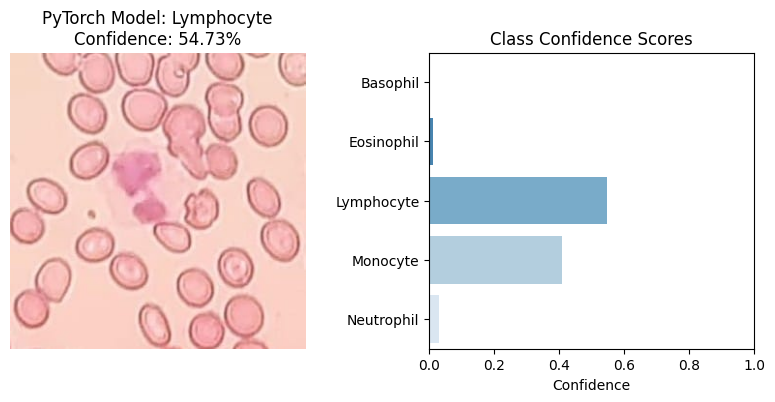

Predictions for D:\Major_Project\sample_from_lab\sample (1).jpg from Keras model:


C:\Users\anujk\AppData\Local\Temp\ipykernel_3608\3179431328.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probabilities, y=class_names, palette="Blues_r")


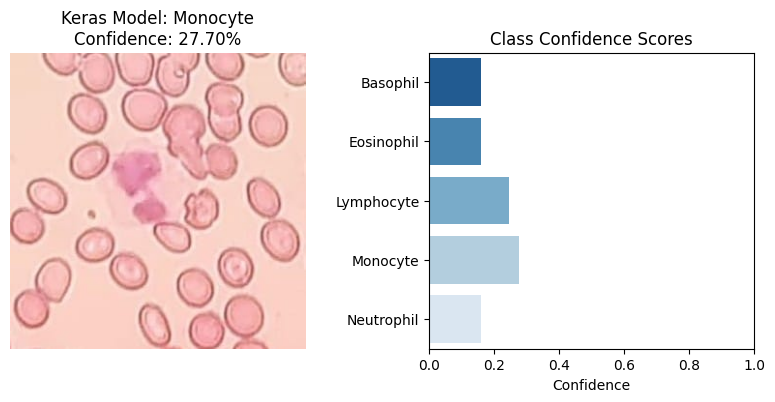

Predictions for D:\Major_Project\sample_from_lab\sample (2).jpg from PyTorch model:


C:\Users\anujk\AppData\Local\Temp\ipykernel_3608\3179431328.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probabilities, y=class_names, palette="Blues_r")


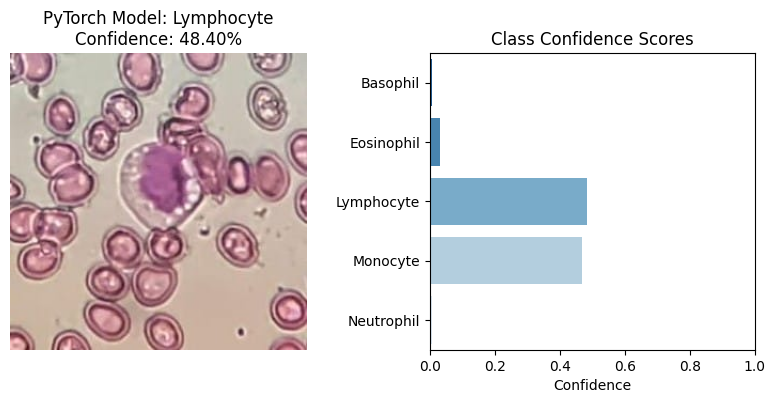

Predictions for D:\Major_Project\sample_from_lab\sample (2).jpg from Keras model:


C:\Users\anujk\AppData\Local\Temp\ipykernel_3608\3179431328.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probabilities, y=class_names, palette="Blues_r")


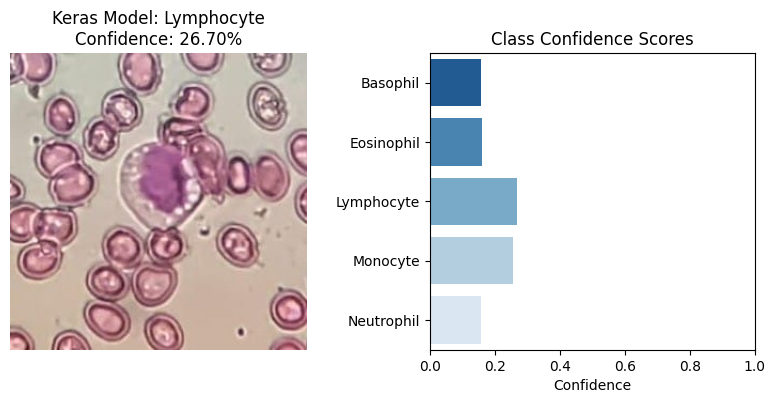

Predictions for D:\Major_Project\sample_from_lab\sample (3).jpg from PyTorch model:


C:\Users\anujk\AppData\Local\Temp\ipykernel_3608\3179431328.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probabilities, y=class_names, palette="Blues_r")


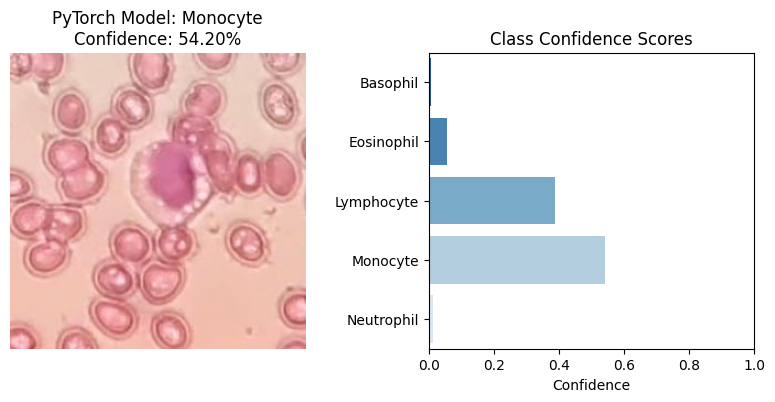

Predictions for D:\Major_Project\sample_from_lab\sample (3).jpg from Keras model:


C:\Users\anujk\AppData\Local\Temp\ipykernel_3608\3179431328.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=probabilities, y=class_names, palette="Blues_r")


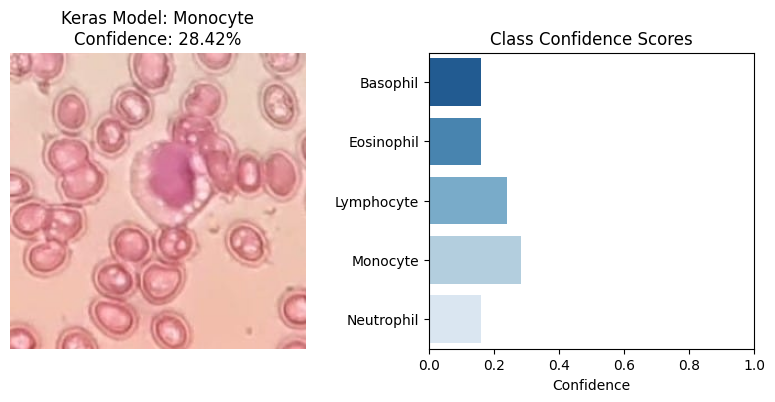

In [11]:
# List of image paths
image_paths = [
r"D:\Major_Project\sample_from_lab\sample (1).jpg",
r"D:\Major_Project\sample_from_lab\sample (2).jpg",
r"D:\Major_Project\sample_from_lab\sample (3).jpg"
]  # Update with actual paths

# Run predictions for all images
for img_path in image_paths:
    print(f"Predictions for {img_path} from PyTorch model:")
    predict_with_model(img_path, model_pth, class_names, "PyTorch Model", is_pytorch=True)
    
    print(f"Predictions for {img_path} from Keras model:")
    predict_with_model(img_path, model_keras, class_names, "Keras Model")